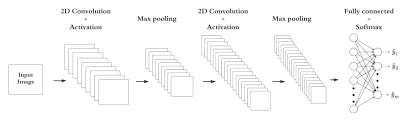

### **What is CNN (Convolutional Neural Network)?**  
A **Convolutional Neural Network (CNN)** is a type of deep learning model specifically designed for processing structured grid data, such as images. It is widely used in **image recognition, object detection, medical imaging, and more.**

---

## **1. CNN Structure**  
A CNN typically consists of the following layers:

### **🔹 Convolutional Layer**  
- This is the core of a CNN.
- It applies **filters (kernels)** to an image to detect features such as edges, textures, and patterns.  
- Each filter slides over the image and produces a **feature map**.
  
Example: A **3×3 filter** scanning an image extracts local patterns.

### **🔹 Activation Function (ReLU)**  
- The **ReLU (Rectified Linear Unit)** function is applied to introduce **non-linearity**.
- It replaces negative values with zero, keeping only positive values.

### **🔹 Pooling Layer (Downsampling)**  
- Reduces the size of feature maps while keeping the most important information.
- **Max Pooling** selects the highest value from a region, making the model more **robust to small variations**.

Example: **2×2 Max Pooling** reduces a 4×4 feature map to **2×2**.

### **🔹 Fully Connected Layer (Dense Layer)**  
- After multiple convolutional and pooling layers, the feature maps are flattened into a **1D vector**.  
- These are fed into **fully connected layers** that classify the image.

### **🔹 Softmax Layer (Output Layer)**  
- Converts the final outputs into probabilities for each class.
- The class with the highest probability is chosen as the predicted label.

---

## **2. CNN Workflow**
1. **Input Image → Convolution → ReLU → Pooling** (repeat multiple times)
2. **Flatten → Fully Connected Layers → Softmax Output**
3. **Predicted Class Label**

---

## **3. Why CNN is Powerful?**
✅ **Automatic Feature Extraction** → No manual feature engineering needed.  
✅ **Translation Invariance** → Recognizes objects even if they are shifted.  
✅ **Efficient & Scalable** → Can handle high-dimensional images effectively.

---

## **4. Applications of CNN**
- **Image Classification** (e.g., Face Recognition, Handwritten Digit Recognition)
- **Object Detection** (e.g., Autonomous Cars, Security Systems)
- **Medical Imaging** (e.g., Detecting Tumors in X-rays)
- **Natural Language Processing** (e.g., Text Classification, Sentiment Analysis)

---

🚀 **CNNs have revolutionized deep learning in computer vision!**

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [45]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [46]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7029 - loss: 0.8526 - val_accuracy: 0.6665 - val_loss: 0.9557
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.7166 - loss: 0.8038 - val_accuracy: 0.6868 - val_loss: 0.8891
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7328 - loss: 0.7575 - val_accuracy: 0.6810 - val_loss: 0.9100
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.7479 - loss: 0.7131 - val_accuracy: 0.7034 - val_loss: 0.8685
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7587 - loss: 0.6888 - val_accuracy: 0.6952 - val_loss: 0.9016


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

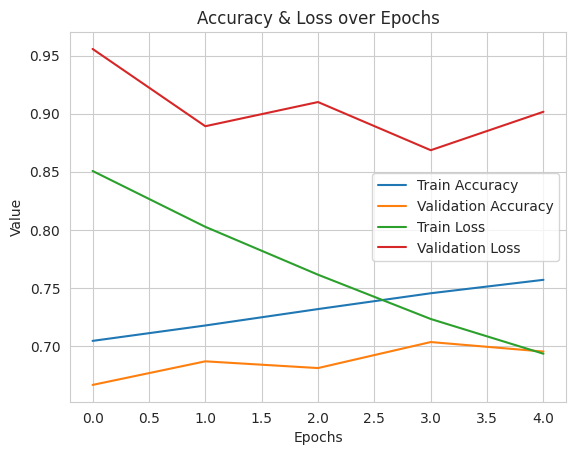

In [60]:
import matplotlib.pyplot as plt
model.summary()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Accuracy & Loss over Epochs')
plt.show()